# Prediction of Movies' Performance based on IMDb data
### Prject(Group 6):  Joanne Qu, Zhitong Zhou, Zhe Shen


In [1]:
# These are all libraries we will use in this project
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part I: Introduction and Overview

## Part II: Data Collection and Cleaning

There is a very famous saying that is repeated by data scientists: "Garbage in, garbage out.". So the process of data collection and cleaning will be one of the most important parts of our work.We will do the following in this section：

* We will collect the data from [IMDb](https://www.imdb.com/interfaces/) by `Scrapy`: **imdb.csv** and receive:

     1. **name.basics.tsv**: contains info about people, including names, professions, etc.
    
     2. **title.akas.tsv**: contains the titles of movies in different languages
    
     3. **title.basics.tsv**: contains info about all movies, tv shows
    
     4. **title.crew.tsv**: contains info about the crew
    
     5. **title.episode.tsv**: contains info about the episode of the tv shows
    
     6. **Title.principals.tsv (2.4GB)**: contains info about the principal cast of the movies
    
     7. **title.ratings.tsv**: contains ratings of all movies, tv shows


* Data Cleaning: We processed the data for preventing pollution on test data.

    Especially **name.basics.tsv**, **title.basics.tsv**, **Title.principals.tsv (2.4GB)**, **title.ratings.tsv**.
    
    
* Creating Database and  merge the data

## Part III:Exploratory Analysis and Visualization
In this section we will analyze the cleaned data. The goal is to identify the features that are most relevant for movie ratings. In this process we will use some visualizations to help the analysis.

### Part III (1):Checking the dataframe and choosing factors
First, we import the cleaned dataset. The whole dataset has 12 factors as well as over 400,000 movie data.

In [2]:
imdb = pd.read_csv('imdb.csv')
imdb

,Unnamed: 0,tconst,nconst,category,averageRating,numVotes,primaryTitle,isAdult,startYear,runtimeMinutes,genres,primaryName
0,92759,tt0013274,nm0412842,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Nikolai Izvolov
1,92760,tt0013274,nm0895048,director,6.7,48,Istoriya grazhdanskoy voyny,0,2021,133,Documentary,Dziga Vertov
2,522892,tt0062336,nm0815612,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Rubén Sotoconil
3,522893,tt0062336,nm1860495,actress,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Claudia Paz
4,522894,tt0062336,nm0016013,actor,6.4,164,The Tango of the Widower and Its Distorting Mi...,0,2020,70,Drama,Luis Alarcón
...,...,...,...,...,...,...,...,...,...,...,...,...
404310,54610727,tt9916730,nm6096005,actor,8.3,10,6 Gunn,0,2017,116,\N,Devadhar Archit
404311,54610728,tt9916730,nm0059461,actor,8.3,10,6 Gunn,0,2017,116,\N,Sunil Barve
404312,54610729,tt9916730,nm13233318,actor,8.3,10,6 Gunn,0,2017,116,\N,Ganesh Vasant Patil
404313,54610730,tt9916730,nm4852679,actor,8.3,10,6 Gunn,0,2017,116,\N,Bhushan Pradhan


In our project, ratings are the most important indicator of a film's popularity. So we can start by looking at the specific data of the ratings.

In [5]:
imdb.averageRating.describe()

count    404315.000000
mean          6.057180
std           1.522904
min           1.000000
25%           5.100000
50%           6.200000
75%           7.100000
max          10.000000
Name: averageRating, dtype: float64

In our data set, we can see that the average rating is around 6.0 and the median is 6.2. And most scores are between 5.1 and 7.1. This will affect our next specific rating of the movie's popularity. For now, we will make the following scale of popularity: 
- Very Positive(>7.1)
- Mostly Positive(6.0-7.1)
- Mostly nagative(5.1-6.0)
- Very Nagative(<5.1)

Then, let's explore which factors are strongly correlated with the scores, which will greatly help our machine learning model to make predictions:

In [6]:
# Check how many factors our data set have
imdb.columns.values.tolist()

['Unnamed: 0',
 'tconst',
 'nconst',
 'category',
 'averageRating',
 'numVotes',
 'primaryTitle',
 'isAdult',
 'startYear',
 'runtimeMinutes',
 'genres',
 'primaryName']

It can be clearly observed that the first 3 factors are only represent  the movie or the actor/director. So we can exclude these 3 factors.And **averageRating**, **numVotes**, **isAdult**, **startYear** and **runtimeMinutes** are very good quantifiable data. genres would also be one of the factors that could have a significant impact. So we will analyze these factors next.

### Part III (2): Visualization and Final factor choosing
After identifying the factors that we need to focus on, we can visualize these factors to find the ones that we will eventually use in our model.In this regard, we will explore the relationship of a little：
 - **Average rating** and **number of votes**
 - **Average rating** and **Aldut/Not Aldut**
 - **Average rating** and **film release year**

Text(0.5, 1.0, 'The distribution of  average rating')

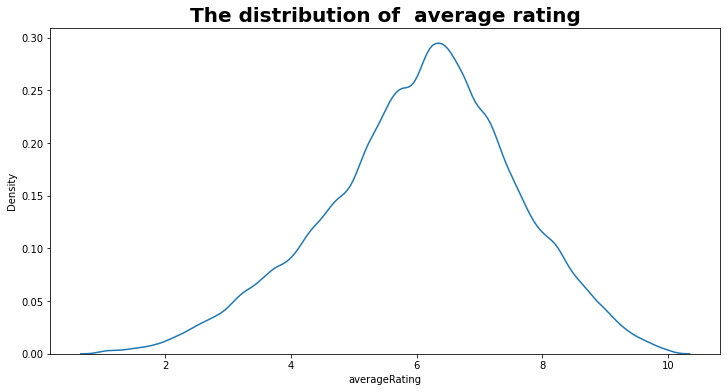

In [7]:
plt.figure(figsize=(12, 6))
sns.kdeplot(imdb['averageRating'])
plt.title('The distribution of  average rating', fontsize=20, weight='bold', color='black')